## Simple time series forecasting with `sktime`

`sktime` comes with several forecasting algorithms sharing a common interface.

Forecasters are trained on a single series of data and make predictions within the provided forecast horizon.

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sktime.datasets import load_airline
from sktime.forecasters import *
import numpy as np
import warnings

warnings.simplefilter('ignore', FutureWarning)
sns.set(style="darkgrid", palette="colorblind")

<IPython.core.display.Javascript object>


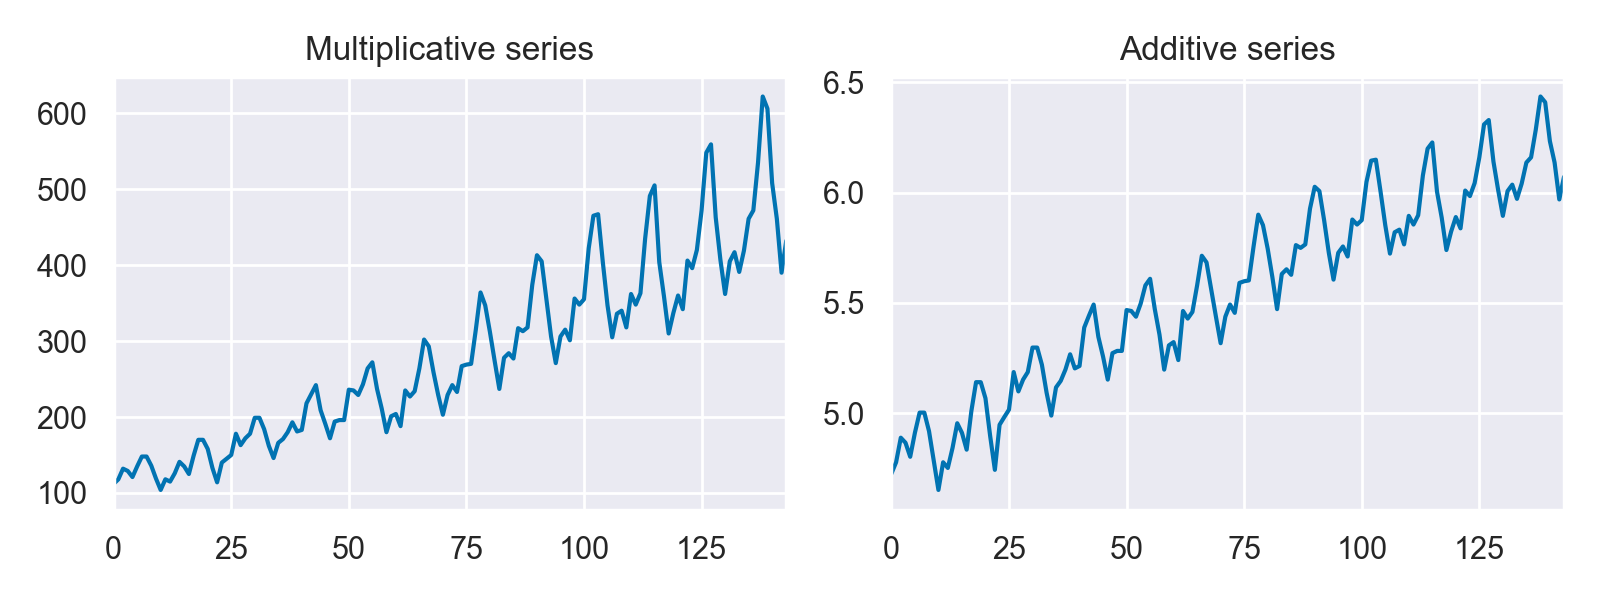

In [2]:
airline = load_airline()
ln_airline = np.log1p(airline)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
airline.plot(ax=axes[0], title="Multiplicative series")
ln_airline.plot(ax=axes[1], title="Additive series")
fig.tight_layout()

In [3]:
def do_forecast(ts, fcstr, test_size=20):
    train, test = ts[:-test_size], ts[-test_size:]
    train.name = ts.name + " (train)"
    test.name = ts.name + " (test)"
    
    # Forecast horizons should be an array starting at 1
    fh = np.arange(len(test)) + 1
    
    if isinstance(fcstr, DummyForecaster):
        fcstr.fit(train, fh=fh)
    else:
        fcstr.fit(train)
    
    fcstr.plot(fh=fh, y_train=train, y_true=test)

<IPython.core.display.Javascript object>


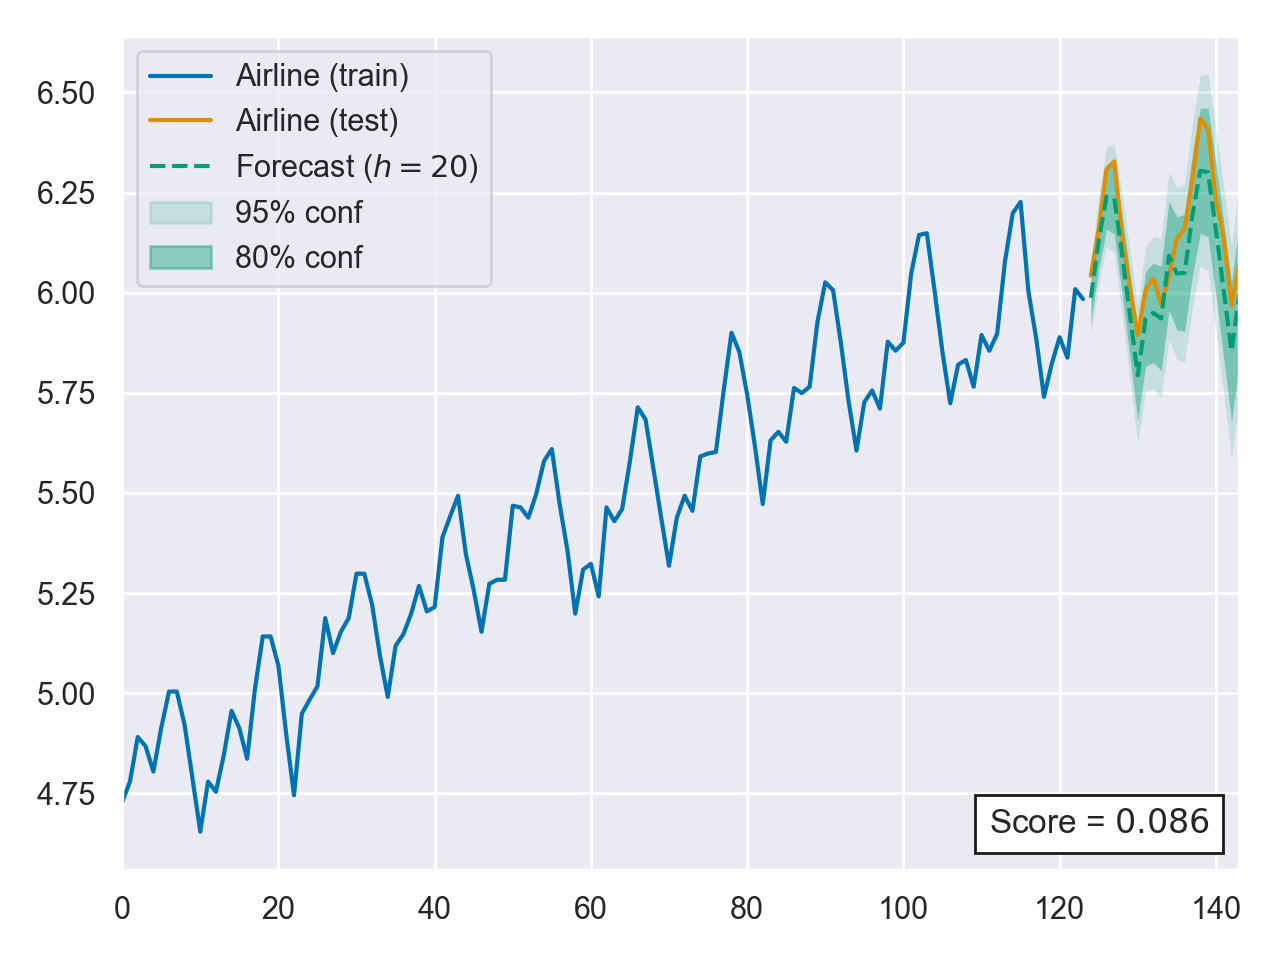

CPU times: user 431 ms, sys: 30.7 ms, total: 461 ms
Wall time: 430 ms


In [4]:
theta = ThetaForecaster(seasonal_periods=12)
%time _ = do_forecast(ln_airline, theta)

<IPython.core.display.Javascript object>


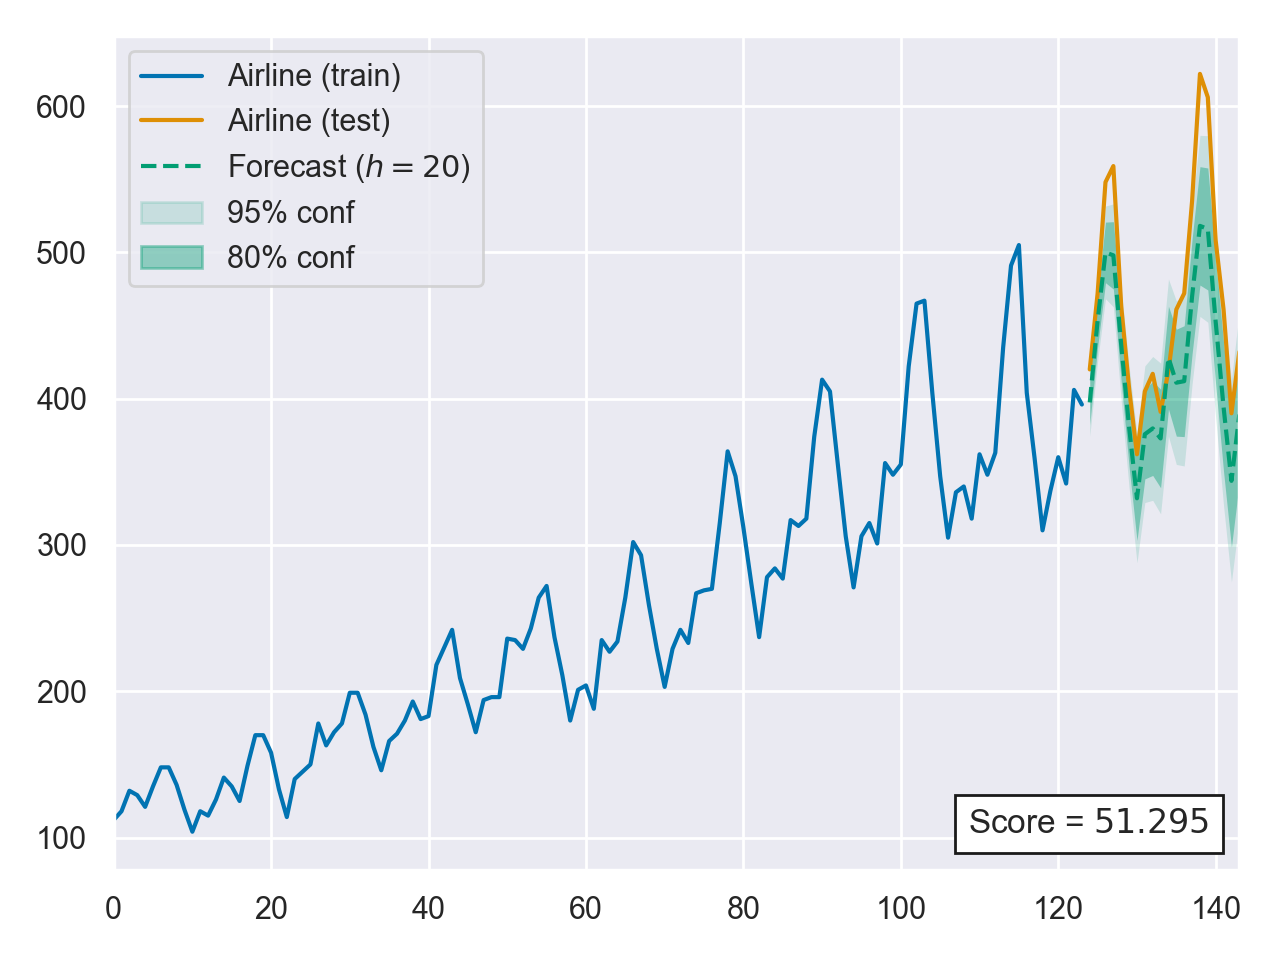

CPU times: user 286 ms, sys: 112 ms, total: 398 ms
Wall time: 212 ms


In [5]:
theta2 = ThetaForecaster(seasonal_periods=12)
%time _ = do_forecast(airline, theta2)

<IPython.core.display.Javascript object>


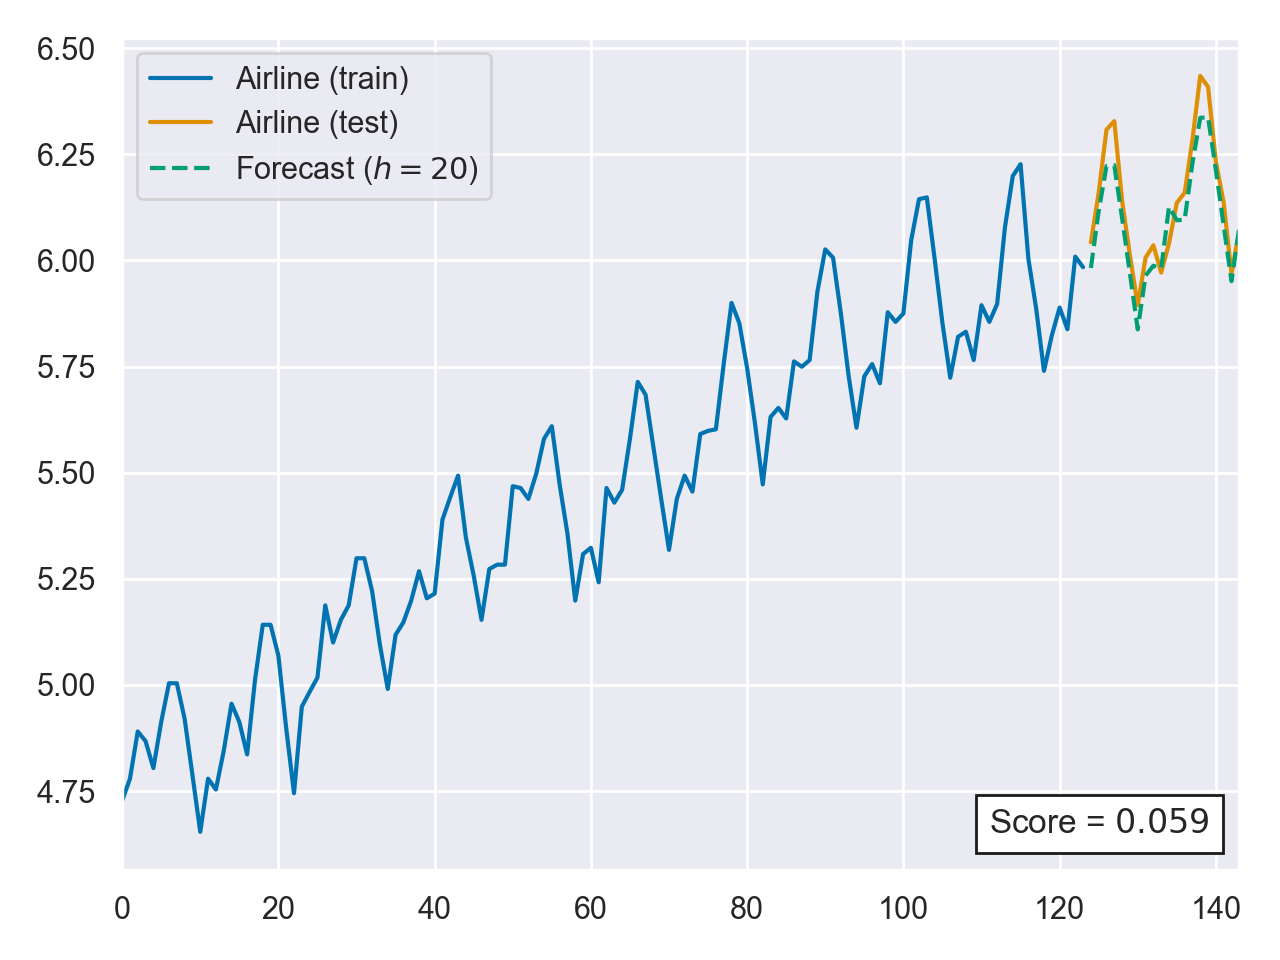

CPU times: user 365 ms, sys: 106 ms, total: 471 ms
Wall time: 270 ms


In [6]:
ses = ExpSmoothingForecaster(trend='add', seasonal='add', seasonal_periods=12)
%time _ = do_forecast(ln_airline, ses)

<IPython.core.display.Javascript object>


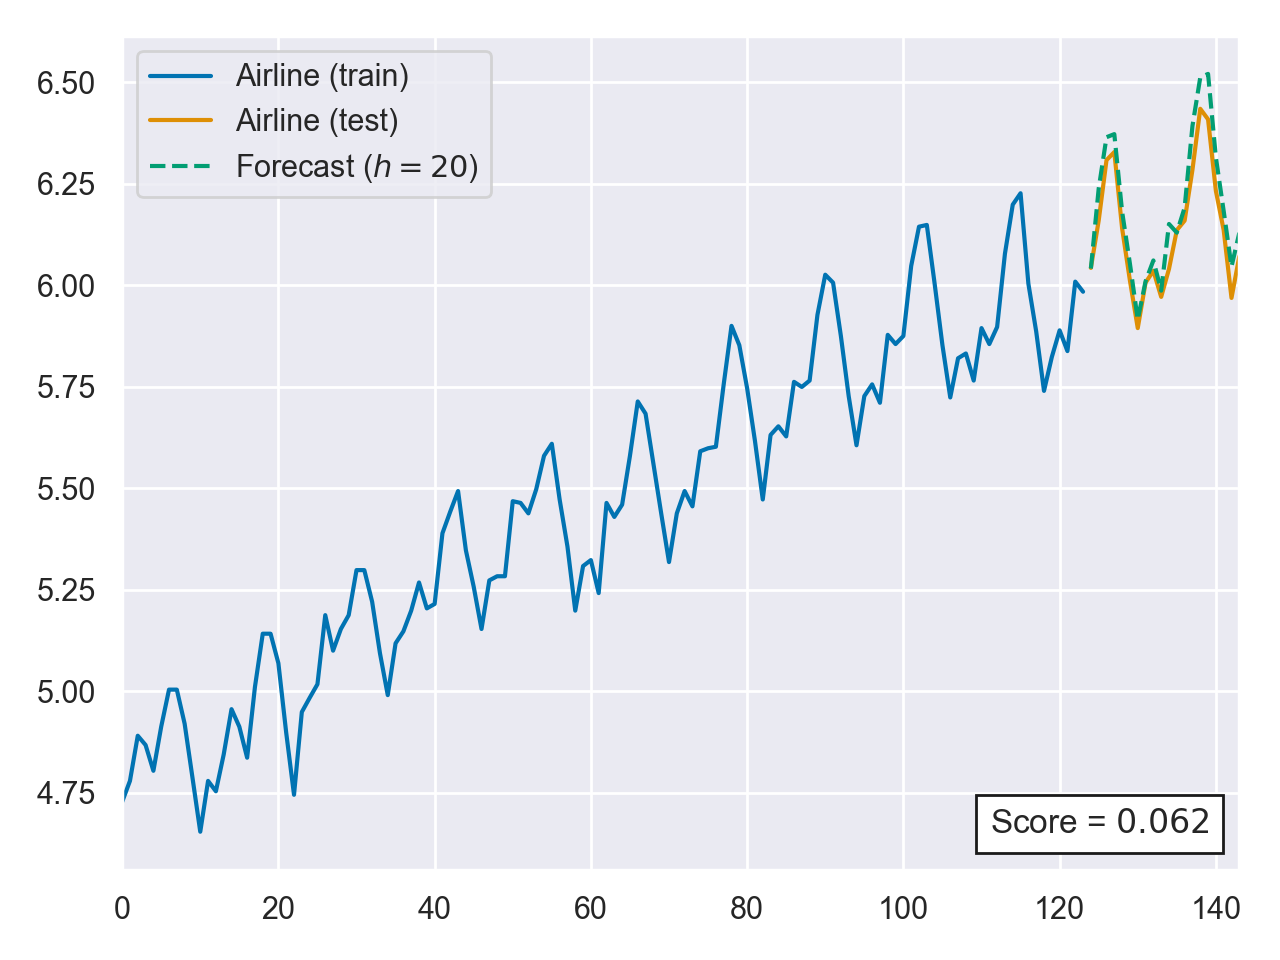

CPU times: user 1min 37s, sys: 1min 38s, total: 3min 15s
Wall time: 26.3 s


In [7]:
arima321 = ARIMAForecaster(seasonal_order=(3, 2, 1, 12))
%time _ = do_forecast(ln_airline, arima321)

<IPython.core.display.Javascript object>


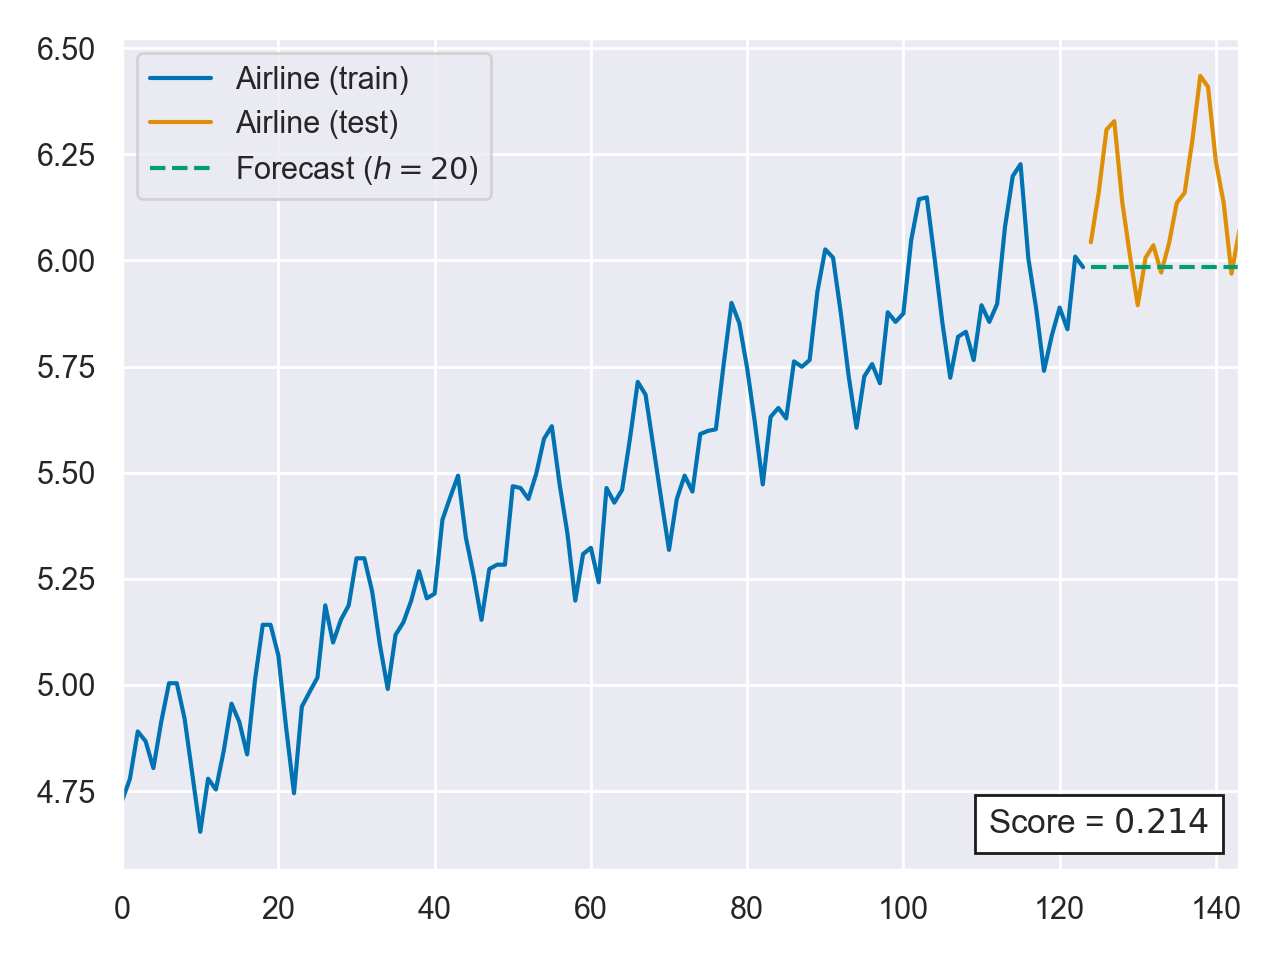

CPU times: user 223 ms, sys: 102 ms, total: 325 ms
Wall time: 141 ms


In [8]:
%time _ = do_forecast(ln_airline, DummyForecaster('last', sp=12))